In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'EmployeeID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [25, 32, 45, 23, 34, 50, 29, 30, 40, 28],
    'Income': [50000, 60000, 100000, 55000, 65000, 120000, 58000, 62000, 70000, 54000],
    'Experience': [2, 7, 20, 1, 8, 25, 5, 6, 15, 3]
}

In [3]:
df = pd.DataFrame(data)

In [4]:
print("Number of missing values:\n", df.isnull().sum())

Number of missing values:
 EmployeeID    0
Age           0
Income        0
Experience    0
dtype: int64


In [5]:
X = df[['Age', 'Income', 'Experience']]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters for example
kmeans.fit(X_scaled)

c:\Users\kande\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [8]:
df['Cluster'] = kmeans.labels_

In [9]:
print("\nClustered Data:")
print(df)


Clustered Data:
   EmployeeID  Age  Income  Experience  Cluster
0           1   25   50000           2        0
1           2   32   60000           7        2
2           3   45  100000          20        1
3           4   23   55000           1        0
4           5   34   65000           8        2
5           6   50  120000          25        1
6           7   29   58000           5        0
7           8   30   62000           6        2
8           9   40   70000          15        2
9          10   28   54000           3        0


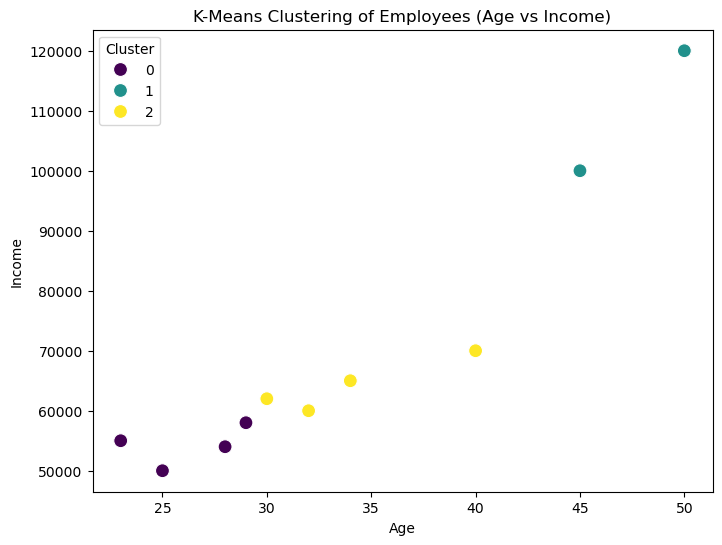

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Age'], y=df['Income'], hue=df['Cluster'], palette='viridis', s=100
)
plt.title("K-Means Clustering of Employees (Age vs Income)")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(title="Cluster")
plt.show()